In [1]:
%matplotlib inline 

# EDA
***

# TODOS:
Validata before working on data that no NAN appear

## Table of Contents
***
* [Aim](#aim)
* [Code Setup](#code-setup)
* [Data Import](#data-import)
* [Task 1 - Number of Products by Department](#task1)
* [Task 2 - How many Orders do Customers make?](#task2)
* [Task 3 - Number of Times Reordered](#task3)
* [Task 4 - Distrbution of Orders by Hour of Day](#task4)
* [Task 5 - Distrbution of Top Selling Products](#task5)
* [Task 6 - Number of Products by Aisle](#task6)
* [Task 7 - Which Product do People put into the Cart First](#task7)

## Aim <a class="anchor" id="aim"></a>
***

The aim of this notebook is to do some Exploratory data analysis on the provisioned Instacart Data

## Code Setup <a class="anchor" id="code-setup"></a>
***

### Constants

In [2]:
instacart_dir = "instacart_2017_05_01/"
my_orders_file = "my_orders.csv"
products_file = "products.csv"
aisles_file = "aisles.csv"
departments_file = "departments.csv"
orders_products_prior_file = "my_order_products__prior.csv"
orders_products_train_file = "my_order_products__train.csv"

### Import Libraries

In [3]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("paper")

### Useful Functions

### Size Function

In [4]:
def size(obj):
    """Return size of object in MB"""
    return "{0:.2f} MB".format(sys.getsizeof(obj) / (1000 * 1000))

### File Read

In [5]:
def read_csv_file(file_name):
    return pd.read_csv(instacart_dir + file_name)

## Data Import <a class="anchor" id="data-import"></a>
***

### Orders Data

In [6]:
orders = read_csv_file(my_orders_file)
print("Orders, dimension: ",orders.shape, "   size: ", size(orders))
orders.head()

Orders, dimension:  (306, 8)    size:  0.04 MB


,Unnamed: 0,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,12202,472199,765,prior,1,2,21,NaN
1,12203,1424394,765,prior,2,1,21,20.0
2,12204,889292,765,prior,3,6,21,30.0
3,12205,2809253,765,prior,4,3,20,30.0
4,12206,2392861,765,prior,5,1,12,19.0


### Products Data

In [7]:
products = read_csv_file(products_file)
print("Products, dimension: ",products.shape, "   size: ", size(products))
products.head()

Products, dimension:  (49688, 4)    size:  5.57 MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


### Departments Data

In [8]:
departments = read_csv_file(departments_file)
print("Departments, dimension: ",departments.shape, "   size: ", size(departments))
departments.head()

Departments, dimension:  (21, 2)    size:  0.00 MB


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


### Aisles Data

In [9]:
aisles = read_csv_file(aisles_file)
print("Aisles, dimension: ",aisles.shape, "   size: ", size(aisles))
aisles.head()

Aisles, dimension:  (134, 2)    size:  0.01 MB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


### Order Products Data

In [10]:
orders_products_prior = read_csv_file(orders_products_prior_file)
orders_products_train = read_csv_file(orders_products_train_file)
orders_products = pd.concat([orders_products_prior, orders_products_train])
print("Order Products, dimension: ",orders_products.shape, "   size: ", size(orders_products))
orders_products.head()

Order Products, dimension:  (2683, 5)    size:  0.13 MB


,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered
0,147221,15511,429,1,0
1,147222,15511,46397,2,0
2,147223,15511,27323,3,0
3,147224,15511,28842,4,1
4,147225,15511,4605,5,0


## Task 1 - Number of Products by Department <a class="anchor" id="task1"></a>
***

### Dataframe of Products by Departments

In [11]:
# Create the count of products for department_id
product_department_count = (products[["department_id", "product_id"]]
                            .groupby(["department_id",])
                            .size()
                            .reset_index(name='product_count')
                            .sort_values(by=['product_count'], ascending=False))
# Join in the Department to the above Dataframe so the Deparment name is available
product_department_count_info = product_department_count.merge(departments, on="department_id")
product_department_count_info.head(product_department_count_info.shape[0])


,department_id,product_count,department
0,11,6563,personal care
1,19,6264,snacks
2,13,5371,pantry
3,7,4365,beverages
4,1,4007,frozen
5,16,3449,dairy eggs
6,17,3085,household
7,15,2092,canned goods
8,9,1858,dry goods pasta
9,4,1684,produce


### Bar Chart or Product Count by Department

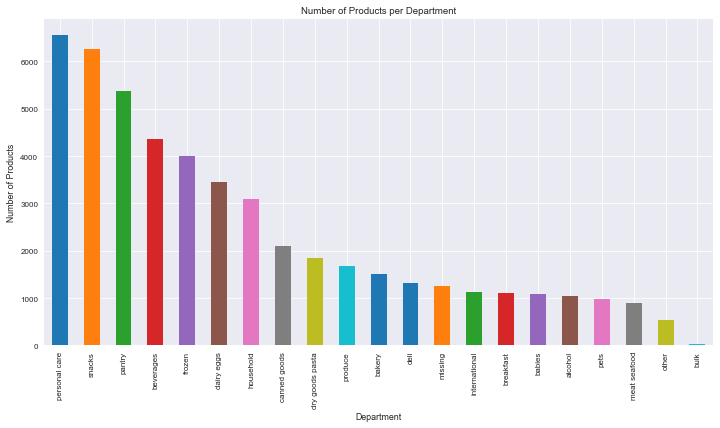

In [12]:
fig, ax = plt.subplots()
product_department_count_info['product_count'].plot.bar()
ax.set_xticklabels(product_department_count_info.department, rotation='vertical')
plt.title("Number of Products per Department")
plt.ylabel("Number of Products")
plt.xlabel("Department")
plt.show()

## Task 2 - How Many Orders do Customers Make <a class="anchor" id="task1"></a>
***

#### Dataframe of Order Counts per Customer

In [13]:
# Only take into account if the user id and order_id are present
filtered_orders = orders[["user_id", "order_id"]]
filtered_order = filtered_orders.dropna(thresh=1)
# Get count based on filtered orders
user_order_count = (filtered_orders
                    .groupby(["user_id",])
                    .size()
                    .reset_index(name='order_count')
                    .sort_values(by=['order_count'], ascending=False))
total_order_count = user_order_count["order_count"].sum()
print("Total Order Count : ", total_order_count, ". Total Number of Customers : ", user_order_count.shape[0])
# As list is sorted descending, head can be used to see top 5 customers
user_order_count.head()

Total Order Count :  306 . Total Number of Customers :  20


,user_id,order_count
4,47562,89
15,124199,46
7,70894,38
16,149715,28
9,83908,11


### Pie Chart of Order Counts per Customer
This may not be the best plot for showing all the users however it is clear to see that a large percentage or orders are made by a relatively small amount of users

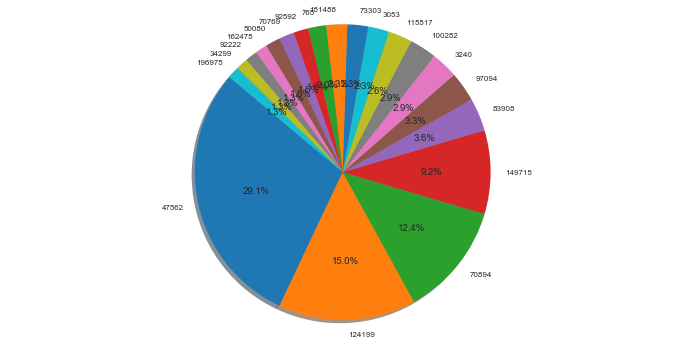

In [14]:
# Plot
plt.pie(user_order_count["order_count"], labels=user_order_count["user_id"],
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

### Bar Chart of Order Counts per Customer

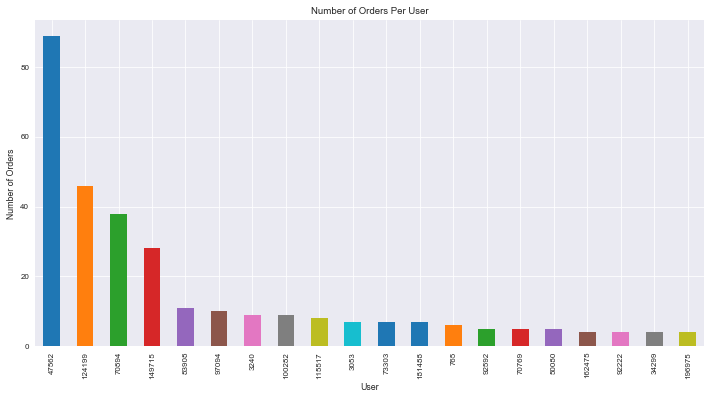

In [15]:
fig, ax = plt.subplots()
user_order_count['order_count'].plot.bar()
ax.set_xticklabels(user_order_count["user_id"], rotation='vertical')
plt.title("Number of Orders Per User")
plt.ylabel("Number of Orders")
plt.xlabel("User")
plt.show()

## Task 3 - Numer of Times Product Reordered <a class="anchor" id="task1"></a>
***
for this we should also do some graphs on products never reordered as well as products reordered by a specific user

### Products that have been Reordered

In [16]:
filtered_orders_products = orders_products.dropna(thresh=1)
product_reorder_count = (filtered_orders_products
                        .groupby("product_id")["reordered"]
                        .sum()
                        .to_frame()
                        .reset_index("product_id")
                        .sort_values(by=["reordered"], ascending=False)
                        )
product_reorder_count_info = product_reorder_count.merge(products, on="product_id")
# Get a data frame of all products that were reordered
products_with_reorders =product_reorder_count_info[product_reorder_count_info["reordered"] > 0]
print("Products with Reorders, dimension: ",products_with_reorders.shape, "   size: ", size(products_with_reorders))
products_with_reorders.head()

Products with Reorders, dimension:  (379, 5)    size:  0.05 MB


,product_id,reordered,product_name,aisle_id,department_id
0,40174,66,2% Reduced Fat Organic Milk,84,16
1,4942,51,Vanilla Almond Breeze,91,16
2,9387,39,Granny Smith Apples,24,4
3,24852,31,Banana,24,4
4,22124,29,Total 0% Raspberry Yogurt,120,16


### Products that have been Reordered Bar Chart

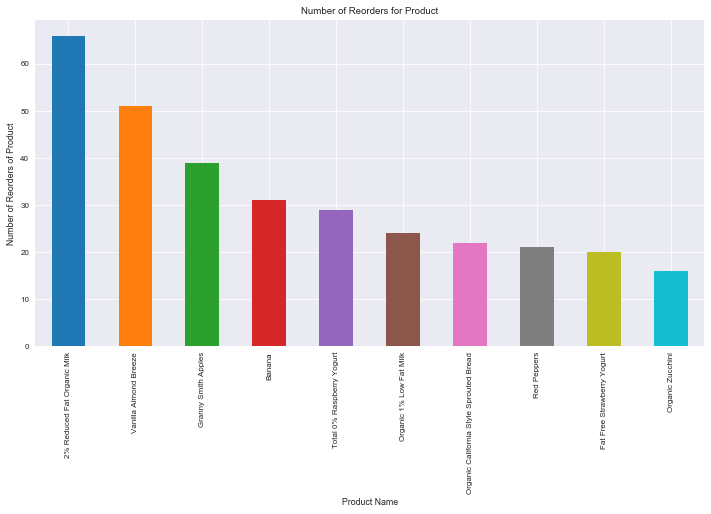

In [17]:
fig, ax = plt.subplots()
top_number_of_products = 10
products_with_reorders['reordered'].head(top_number_of_products).plot.bar()
ax.set_xticklabels(products_with_reorders["product_name"].head(top_number_of_products), rotation='vertical')
plt.title("Number of Reorders for Product")
plt.ylabel("Number of Reorders of Product")
plt.xlabel("Product Name")
plt.show()

### Products Reordered by User Dataframe

In [18]:
orders_products_with_user_info = filtered_orders_products.merge(orders, on="order_id")
reordered_products_with_user_info = orders_products_with_user_info[orders_products_with_user_info["reordered"] > 0]
reordered_products_with_user_info.head()

,Unnamed: 0_x,order_id,product_id,add_to_cart_order,reordered,Unnamed: 0_y,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3,147224,15511,28842,4,1,2487349,149715,prior,13,0,12,6.0
7,147228,15511,4565,8,1,2487349,149715,prior,13,0,12,6.0
11,147232,15511,9741,12,1,2487349,149715,prior,13,0,12,6.0
27,257077,27068,24184,1,1,1179394,70894,prior,5,0,17,6.0
31,257081,27068,4605,5,1,1179394,70894,prior,5,0,17,6.0


In [19]:
reordered_product_count_per_user = (reordered_products_with_user_info.groupby(["user_id", "product_id"])["reordered"]
                                    .sum()
                                    .to_frame()
                                    .reset_index("user_id")
                                    .reset_index("product_id")
                                    .merge(products, on="product_id")
                                    .sort_values(by=["reordered"], ascending=False)
                                   )
print("This dataframe shows what each user reordered")
reordered_product_count_per_user.head()

This dataframe shows what each user reordered


,product_id,user_id,reordered,product_name,aisle_id,department_id
141,40174,47562,66,2% Reduced Fat Organic Milk,84,16
72,4942,47562,51,Vanilla Almond Breeze,91,16
77,9387,47562,38,Granny Smith Apples,24,4
102,22124,47562,29,Total 0% Raspberry Yogurt,120,16
320,10070,124199,24,Organic 1% Low Fat Milk,84,16


As can be see above the user with id 47562 reorders the most which makes sense as this user is responsbile for 29.1% of the overall orders

### Products that have never been Reordered

In [20]:
# Get a data frame of all products that were never reordered
products_without_reorders =product_reorder_count_info[product_reorder_count_info["reordered"] <= 0]
print("There are ",products_without_reorders.shape[0], " products that have never been reordered")
products_without_reorders.head()

There are  583  products that have never been reordered


,product_id,reordered,product_name,aisle_id,department_id
379,39275,0,Organic Blueberries,123,4
380,38991,0,Banana Nut Chia Bar,3,19
381,39097,0,Gluten Free White Sandwich Bread,112,3
382,39301,0,Extra Firm Tofu,14,20
383,39046,0,Smok Cured Turkey Bacon,106,12


## Task 4 - Distrbution of Orders by Hour of Day <a class="anchor" id="task4"></a>
***

### Orders by Hour and Day Dataframe

In [21]:
orders_day_and_hours = (orders[["order_dow", "order_hour_of_day"]]
                        .sort_values(by=["order_dow", "order_hour_of_day"])
                        .dropna(thresh=1)
                       )
orders_day_and_hours_count = (orders_day_and_hours.groupby(["order_dow", "order_hour_of_day"])
                              .size()
                              .reset_index(name='count'))
dows = orders_day_and_hours_count["order_dow"].unique().tolist()
# Assuming 0 is Sunday and 6 is Saturday
monday = orders_day_and_hours_count.loc[orders_day_and_hours_count["order_dow"]==dows[1]]
tuesday = orders_day_and_hours_count.loc[orders_day_and_hours_count["order_dow"]==dows[2]]
wednesday = orders_day_and_hours_count.loc[orders_day_and_hours_count["order_dow"]==dows[3]]
thursday = orders_day_and_hours_count.loc[orders_day_and_hours_count["order_dow"]==dows[4]]
friday = orders_day_and_hours_count.loc[orders_day_and_hours_count["order_dow"]==dows[5]]
saturday = orders_day_and_hours_count.loc[orders_day_and_hours_count["order_dow"]==dows[6]]
sunday = orders_day_and_hours_count.loc[orders_day_and_hours_count["order_dow"]==dows[0]]

orders_day_and_hours_count.head()

,order_dow,order_hour_of_day,count
0,0,0,1
1,0,9,1
2,0,10,2
3,0,11,3
4,0,12,5


### Orders by Hour and Day Graphs

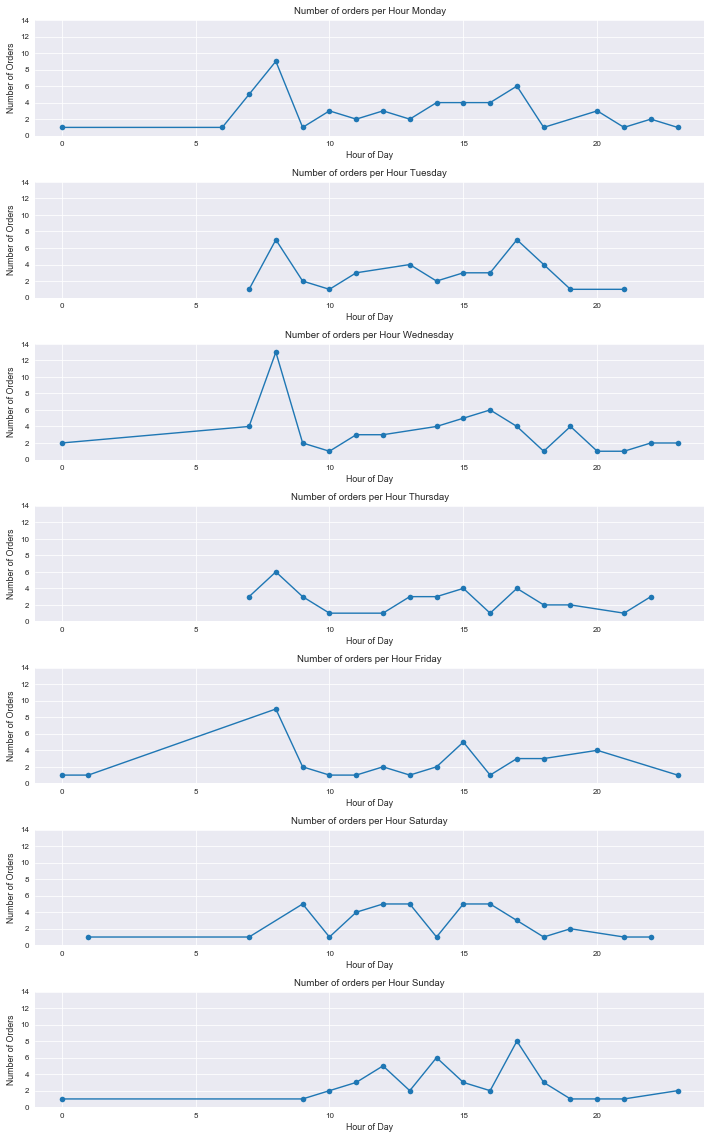

In [22]:
max_count = orders_day_and_hours_count[["count"]].max().values[0] +1
min_count = orders_day_and_hours_count[["count"]].min().values[0] -1

min_hour = orders_day_and_hours_count[["order_hour_of_day"]].min().values[0] -1
max_hour = orders_day_and_hours_count[["order_hour_of_day"]].max().values[0] +1

fig = plt.figure()
fig.set_figheight(20)
plt.subplots_adjust(hspace=0.4)

plt.subplot(7,1,1)
plt.plot(monday["order_hour_of_day"], monday["count"], "-o")
plt.title("Number of orders per Hour Monday")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
ax = plt.gca()
ax.set_ylim([min_count,max_count])
ax.set_xlim([min_hour,max_hour])


plt.subplot(7,1,2)
plt.plot(tuesday["order_hour_of_day"], tuesday["count"], "-o")
plt.title("Number of orders per Hour Tuesday")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
ax = plt.gca()
ax.set_ylim([min_count,max_count])
ax.set_xlim([min_hour,max_hour])

plt.subplot(7,1,3)
plt.plot(wednesday["order_hour_of_day"], wednesday["count"], "-o")
plt.title("Number of orders per Hour Wednesday")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
ax = plt.gca()
ax.set_ylim([min_count,max_count])
ax.set_xlim([min_hour,max_hour])

plt.subplot(7,1,4)
plt.plot(thursday["order_hour_of_day"], thursday["count"], "-o")
plt.title("Number of orders per Hour Thursday")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
ax = plt.gca()
ax.set_ylim([min_count,max_count])
ax.set_xlim([min_hour,max_hour])

plt.subplot(7,1,5)
plt.plot(friday["order_hour_of_day"], friday["count"], "-o")
plt.title("Number of orders per Hour Friday")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
ax = plt.gca()
ax.set_ylim([min_count,max_count])
ax.set_xlim([min_hour,max_hour])

plt.subplot(7,1,6)
plt.plot(saturday["order_hour_of_day"], saturday["count"], "-o")
plt.title("Number of orders per Hour Saturday")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
ax = plt.gca()
ax.set_ylim([min_count,max_count])
ax.set_xlim([min_hour,max_hour])

plt.subplot(7,1,7)
plt.plot(sunday["order_hour_of_day"], sunday["count"], "-o")
plt.title("Number of orders per Hour Sunday")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
ax = plt.gca()
ax.set_ylim([min_count,max_count])
ax.set_xlim([min_hour,max_hour])

plt.show()

### Orders by Hour

Text(0,0.5,'Number of Orders')

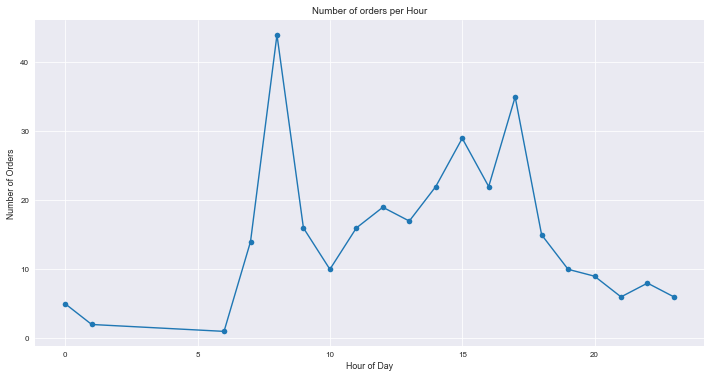

In [23]:
# This groups all the hours together - may not be as useful as the day by day hour breakdown
orders_hours_count = (orders_day_and_hours.groupby(["order_hour_of_day"])
                              .size()
                              .reset_index(name='count'))
fig = plt.figure()
plt.plot(orders_hours_count["order_hour_of_day"], orders_hours_count["count"], "-o")
plt.title("Number of orders per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")

As can be seen the hour of day that has the most orders is 8. If we look at the graphs for Monday through to Friday this also holds true. Saturday at hour 8 is one of the highest order points by ties with a few other hours that day. Sunday is the only occurance where hour 8 is not the most ordered hour, with hour 17 being the most ordered hour on Sunday.

## Task 5 - Distrbution of Top Selling Products <a class="anchor" id="task5"></a>
***

### Dataframe of Products ordered by Amount Sold Descending

In [24]:
all_ordered_products = (orders_products[['product_id']]
                        .dropna(thresh=1)
                       )
ordered_products_count = (all_ordered_products
                          .groupby(["product_id"])
                          .size()
                          .reset_index(name='count')
                          .sort_values(by=['count'], ascending=False)
                          .merge(products, on="product_id")
                         )
ordered_products_count.head()

,product_id,count,product_name,aisle_id,department_id
0,40174,67,2% Reduced Fat Organic Milk,84,16
1,4942,53,Vanilla Almond Breeze,91,16
2,9387,42,Granny Smith Apples,24,4
3,24852,39,Banana,24,4
4,22124,30,Total 0% Raspberry Yogurt,120,16


### Bar Chart of Top Selling Products

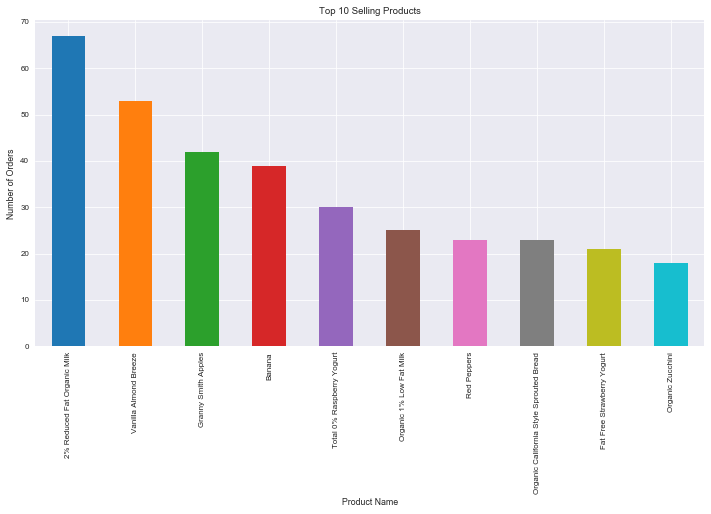

In [25]:
fig, ax = plt.subplots()
number_of_top = 10
ordered_products_count['count'].head(number_of_top).plot.bar()
ax.set_xticklabels(ordered_products_count["product_name"].head(number_of_top), rotation='vertical')
plt.title("Top " + str(number_of_top) + " Selling Products")
plt.ylabel("Number of Orders")
plt.xlabel("Product Name")
plt.show()

## Task 6 - Number of Products by Aisle <a class="anchor" id="task6"></a>
***

### Product Count per Aisle Dataframe

In [26]:
products_per_aisle_count = (products[["product_id", "aisle_id"]]
                            .groupby(['aisle_id'])
                            .size()
                            .reset_index(name='product_count')
                            .sort_values(by=['product_count'], ascending=False)
                            .merge(aisles, on="aisle_id")
                           )
products_per_aisle_count.head()

,aisle_id,product_count,aisle
0,100,1258,missing
1,45,1246,candy chocolate
2,37,1091,ice cream ice
3,47,1038,vitamins supplements
4,120,1026,yogurt


### Product Count per Aisle Bar Chart

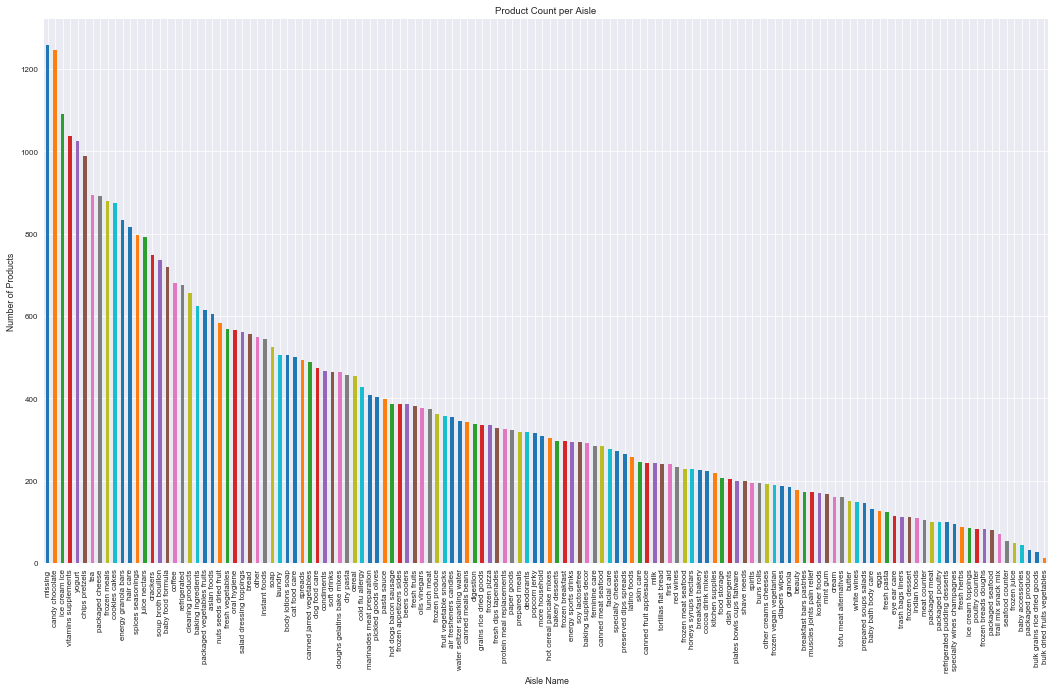

In [27]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(18)
products_per_aisle_count['product_count'].plot.bar()
ax.set_xticklabels(products_per_aisle_count["aisle"], rotation='vertical')
plt.title("Product Count per Aisle")
plt.ylabel("Number of Products")
plt.xlabel("Aisle Name")
plt.show()

Note, you can double click on the graph to make it bigger (provided the page is running and not static)

## Task 7 - Which Product do People put into the Cart First <a class="anchor" id="task7"></a>
***

### Ordered Products Total Count

In [28]:
ordered_product_total = (orders_products[["product_id"]].dropna(thresh=1)
                         .groupby(["product_id"])
                         .size()
                         .reset_index(name="total_count")
                         .sort_values(by=["total_count"], ascending=False)
                        )
ordered_product_total.head()

,product_id,total_count
772,40174,67
84,4942,53
159,9387,42
478,24852,39
415,22124,30


### Ordered Products First in Cart Count

In [29]:
#orders_products[["product_id", "add_to_cart_order"]].dropna(thresh=1)
ordered_products_first_in_cart = orders_products[orders_products["add_to_cart_order"] == 1]
ordered_products_first_in_cart_count = (ordered_products_first_in_cart[["product_id", "add_to_cart_order"]]
                                        .dropna(thresh=1)
                                        .groupby(["product_id"])
                                        .size()
                                        .reset_index(name="first_in_cart_count")
                                        .sort_values(by=["first_in_cart_count"], ascending=False)
                                       )
ordered_products_first_in_cart_count.head()

,product_id,first_in_cart_count
156,40174,33
13,4942,9
89,24184,7
137,34197,5
30,10070,5


In [30]:
combinded_product_count = (ordered_product_total.merge(ordered_products_first_in_cart_count, how="left", on="product_id")
                           .fillna(0)
                          )
combinded_product_count["first_in_cart_probability"] = combinded_product_count["first_in_cart_count"]/combinded_product_count["total_count"]
combinded_product_count = combinded_product_count.sort_values(by=["first_in_cart_probability"], ascending=False)
combinded_product_count.head()

,product_id,total_count,first_in_cart_count,first_in_cart_probability
478,36130,1,1.0,1.0
537,46650,1,1.0,1.0
463,37203,1,1.0,1.0
796,16771,1,1.0,1.0
690,22884,1,1.0,1.0


In places where items were only bought once and were first placed in cart, this does not give very reliable figures as a case study of 1 can not be generalised. Need to set a minimum number of total count to get more reliable probabilities

In [33]:
minimum_times_product_was_bought = 10
combinded_product_count = combinded_product_count[combinded_product_count["total_count"] >= minimum_times_product_was_bought]
combinded_product_count = combinded_product_count.merge(products, on="product_id")
combinded_product_count.head()

,product_id,total_count,first_in_cart_count,first_in_cart_probability,product_name,aisle_id,department_id
0,40174,67,33.0,0.492537,2% Reduced Fat Organic Milk,84,16
1,24184,23,7.0,0.304348,Red Peppers,83,4
2,4605,10,3.0,0.300000,Yellow Onions,83,4
3,28155,11,3.0,0.272727,Premium Lager Beer,27,5
4,25718,14,3.0,0.214286,Cold Brew Coffee,26,7


### Bar Chart of Probability of item being first in basket

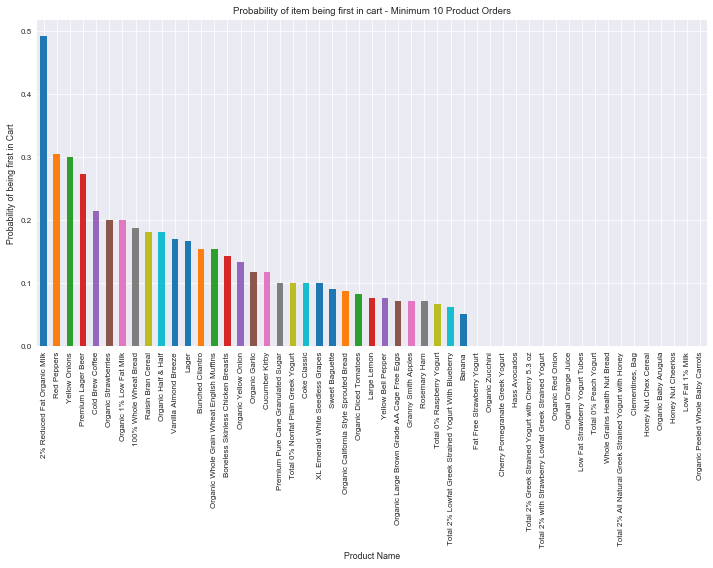

In [34]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)
combinded_product_count['first_in_cart_probability'].plot.bar()
ax.set_xticklabels(combinded_product_count["product_name"], rotation='vertical')
plt.title("Probability of item being first in cart - Minimum " + str(minimum_times_product_was_bought) + " Product Orders")
plt.ylabel("Probability of being first in Cart")
plt.xlabel("Product Name")
plt.show()